# Aerofit Case Study - Descriptive Statistics and Probability

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

- Perform descriptive analytics **to create a customer profile** for each AeroFit treadmill product by developing appropriate tables and charts.
- For each AeroFit treadmill product, construct two-way contingency tables and compute all **conditional and marginal probabilities** along with their insights/impact on the business.


## Dataset 

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:


- Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- MaritalStatus:	Single or partnered
- Usage:	The average number of times the customer plans to use the treadmill each week.
- Income:	Annual income (in $)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles:	The average number of miles the customer expects to walk/run each week 

#### Product Portfolio:

- The KP281 is an entry-level treadmill that sells for $1,500.

- The KP481 is for mid-level runners that sell for $1,750.

- The KP781 treadmill is having advanced features that sell for $2,500.

In [1]:
# Load the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [2]:
# Load the Aerofit Dataset

!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit_treadmill.csv
data = pd.read_csv('aerofit_treadmill.csv')


Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 11.1MB/s]


In [3]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Total 180 rows and 9 columns.
No null values!

- Numerical features - age, education, usage, fitness, income, miles

- Categorical features - product, gender , marital status



Changing object dtypes to category -

In [5]:
#changing object dtype to category  to save memory
data.Product=data["Product"].astype("category")
data.Gender=data["Gender"].astype("category")
data.MaritalStatus=data["MaritalStatus"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


## Looking at unique values of all columns -

In [6]:
list_col=['Product','MaritalStatus','Usage','Fitness','Education','Age']
# How many different models we have?
# What is Martial status of customers?
# How many days people expect to use treadmill?
# What is self rated fitness of customers buying treadmill?
# What is number of years of eductaion of customer buying treadmill?
# What is age of customer buying treadmill?

for col in list_col:
  print(col, data[col].unique())


Product ['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
MaritalStatus ['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']
Usage [3 2 4 5 6 7]
Fitness [4 3 2 1 5]
Education [14 15 12 13 16 18 20 21]
Age [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]


- There are 3 different treadmills products.
- There are both Partnered and single customers
- Age of customers ranges from 18 to 50
- Education in years is from 12 -21
- Usage is from 2 days to 7 days a week
- Fitness level of customers from 1 -5

In [7]:
data.describe()  # statistical summary for numerical features - age,education,usage,fitness,income,miles

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.
- Maximum income of treadmill user is 100K , Average income approx. 54K ,while median is is approx. 51K.
- Expected Treadmill usage is atleast Once a week , maximum is 7 times a week and on Average 3 times a week
- Customer education is between 12 -21 years, with average and median of 15 years and maximum of 16 years
- Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.
- Average self rated fitness is 3.

## Missing value and outlier detection

In [8]:
# detecting nulls
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No null values!

## Are there any duplicate values?

In [9]:
data.duplicated().sum()

0

## Non-Graphical Analysis: Value counts and unique attributes

In [10]:
# Which is most sold Model?
print('Product Purhased')
print(data['Product'].value_counts())
print('\n')

# Are Male customers buying treadmill more than female customers?
print('Gender')
print(data['Gender'].value_counts())
print('\n')

# Are married customer buying Treadmill more than Single customers?
print('Marital Status')
print(data['MaritalStatus'].value_counts())

Product Purhased
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


Gender
Male      104
Female     76
Name: Gender, dtype: int64


Marital Status
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


- The entry level KP281 is purchased most number of times followed by mid level KP481 and last the highest grade KP781 is sold the least.

- Male buy more products than females.

- People with relationship status as Partnered buy more products than the singles. 

In [11]:
data[data['Product'] == 'KP281'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


KP281 was bought by 80 customers whose -
- Average age of customer is 28.5 , Median is 26
- Average Education is 15 and median is 16.
- Expected usage is 3 day a week
- Expected Miles to run is on an Average 82.78 miles per week and median is 85.
- Self rated fitness is 3 that is average fitness level
- Average income and median is around $46K.


In [12]:
data[data['Product'] == 'KP481'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


KP481 was bought by 60 customers whose -
- Average age of customer is 28.9 , Median is 26
- Average Education is 15 and median is 16.
- Expected usage is 3 day a week
- Expected Miles to run is on an Average 88 miles per week and median is 85.
- Self rated fitness is 3 that is average fitness level
- Average income and median is around $49K.


In [13]:
data[data['Product'] == 'KP781'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


KP781 was bought by 40 customers whose -
- Average age of customer is 29, Median is 27
- Average Education is 17 and median is 18.
- Expected usage is 4-5 days/week.
- Expected Miles to run is 166miles/week.
- Self rated fitness is 4.6 on average.
- Average income and median is around 76K.


## Detecting outliers

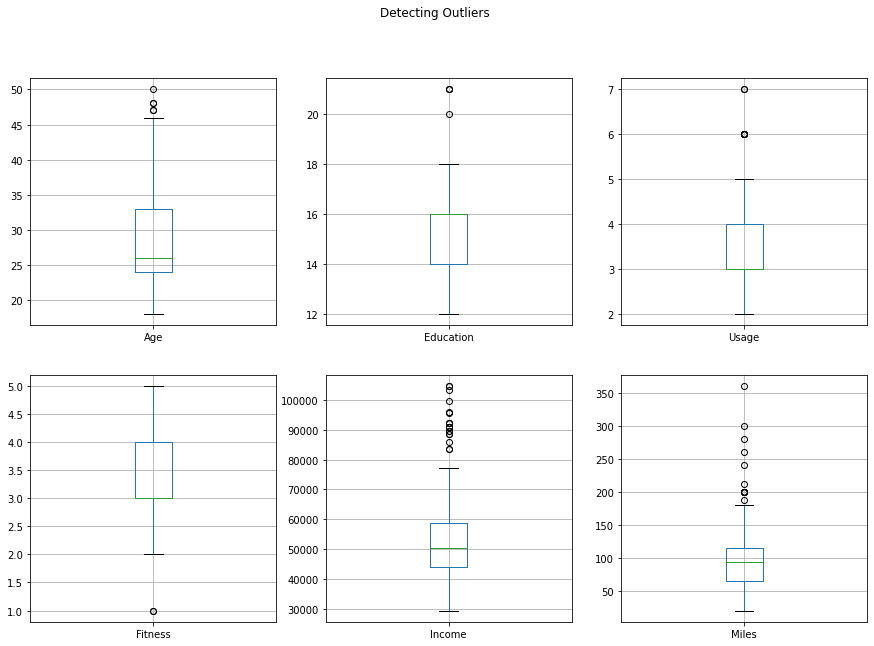

In [14]:

fig=plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
data[['Age']].boxplot()

plt.subplot(2, 3, 2)
data[['Education']].boxplot()

plt.subplot(2, 3, 3)
data[['Usage']].boxplot()

plt.subplot(2, 3, 4)
data[['Fitness']].boxplot()

plt.subplot(2, 3, 5)
data[['Income']].boxplot()

plt.subplot(2, 3, 6)
data[['Miles']].boxplot()

fig.suptitle("Detecting Outliers")
plt.show()

- Median income is 50K, most customers hav income below 70K, some outliers who earn bbeyond 80K.
- Median age of cusotmers is 26, most in range 20-40.

- Miles average is 80, some outliers run more than 200miles/week

- Most of the customers have self-rated their fitness as 3( average).

- Most of the customers have 16 year of education, there are few outliers.

- Most of customers expect they will be using the treadmill 3-4 days per week, few outliers expecting to use treadmill for 6 or 7 times a week

## Visual Analysis - Univariate & Bivariate 
- For continuous variable(s): Distplot, countplot, histogram for univariate analysis 
- For categorical variable(s): Boxplot
- For correlation: Heatmaps, Pairplots

#### For correlation: Heatmaps, Pairplots

In [15]:
corr = data.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

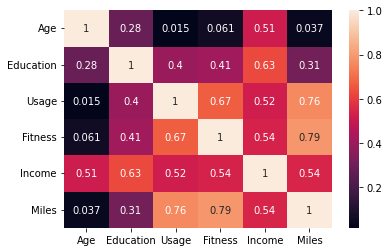

In [16]:
sns.heatmap(corr, annot=True)

- Age and income are positively correlated
- Education and income are positively correlated
- Usage is correlated with Fitness ans Miles

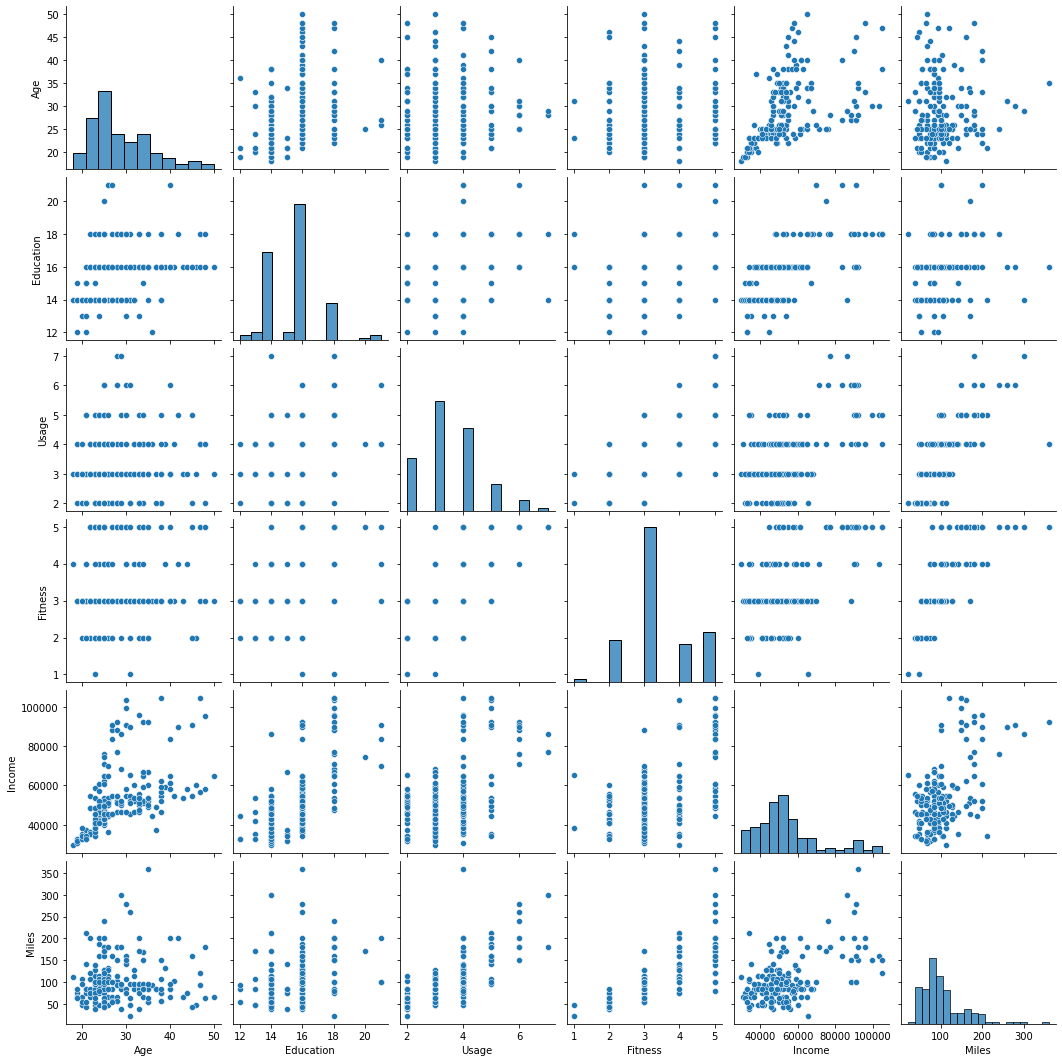

In [17]:
sns.pairplot(data)

### For categorical variable(s): Boxplot

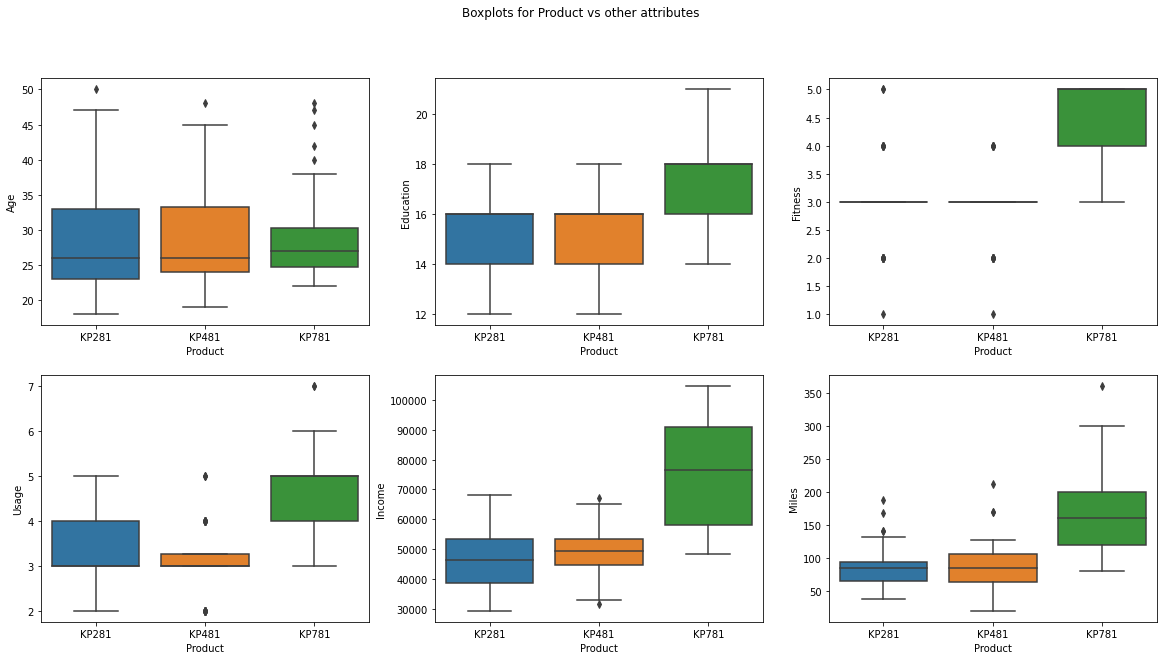

In [18]:
fig=plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.boxplot(x="Product", y="Age", data=data)

plt.subplot(2, 3, 2)
sns.boxplot(x="Product", y="Education", data=data)

plt.subplot(2, 3, 3)
sns.boxplot(x="Product", y="Fitness", data=data)

plt.subplot(2, 3, 4)
sns.boxplot(x="Product", y="Usage", data=data)

plt.subplot(2, 3, 5)
sns.boxplot(x="Product", y="Income", data=data)

plt.subplot(2, 3, 6)
sns.boxplot(x="Product", y="Miles", data=data)

fig.suptitle("Boxplots for Product vs other attributes")
plt.show()

It is clearly seen that the high end KP781 is bought by customers who -

- have age 25-30 years old, but many outliers who have age >40 for this treadmill.
- have a larger number of education years (~16-18)
- have self rated fitness of 4-5
- plan to use equipment 4-5 times a week
- have significantly higher income ($60000 and above)
- expect significantly higher number of miles to walk each week (>150).
- customers for this high end model are more educated, more rich, plan to use it more frequently, run more miles, have high self rated fitness, more health conscious.
- more males and more partnered buy this model

This is in contrast to both the low and mid level models KP281 and KP481 who are bought by customers who -

- have age 20-35 years old.
- have a somewhat less number of education years (~14-16)
- have self rated fitness of 3
- plan to use equipment 3-4 times a week
- have significantly lower income ($50000 and less)
- expect significantly lower number of miles to walk each week (less than 100).

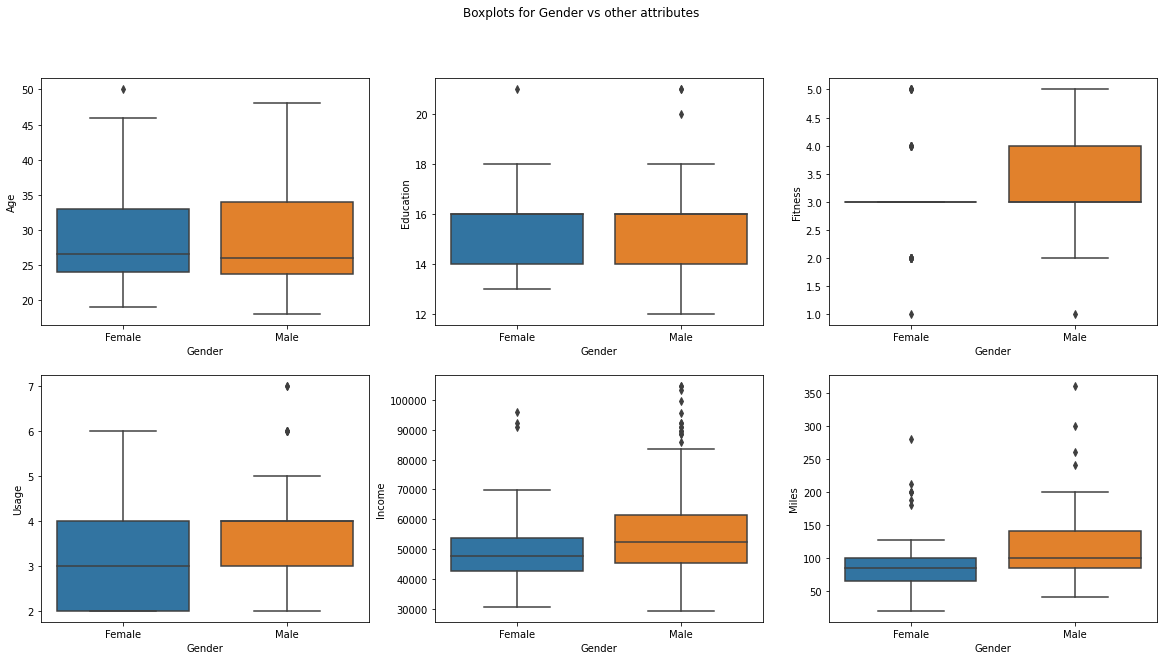

In [19]:
fig=plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.boxplot(x="Gender", y="Age", data=data)

plt.subplot(2, 3, 2)
sns.boxplot(x="Gender", y="Education", data=data)

plt.subplot(2, 3, 3)
sns.boxplot(x="Gender", y="Fitness", data=data)

plt.subplot(2, 3, 4)
sns.boxplot(x="Gender", y="Usage", data=data)

plt.subplot(2, 3, 5)
sns.boxplot(x="Gender", y="Income", data=data)

plt.subplot(2, 3, 6)
sns.boxplot(x="Gender", y="Miles", data=data)

fig.suptitle("Boxplots for Gender vs other attributes")
plt.show()

- In terms of age and education , males and females are almost same.
- Males have higher self rated fitness, more usage, more income , more number of miles than females.

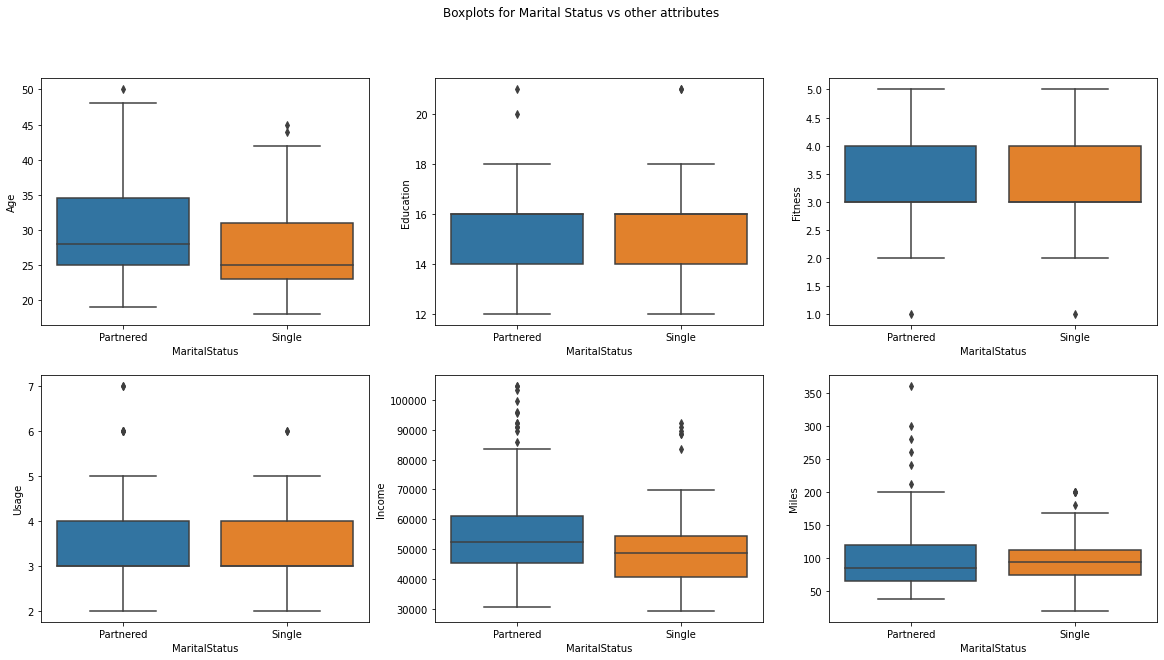

In [20]:
fig=plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.boxplot(x="MaritalStatus", y="Age", data=data)

plt.subplot(2, 3, 2)
sns.boxplot(x="MaritalStatus", y="Education", data=data)

plt.subplot(2, 3, 3)
sns.boxplot(x="MaritalStatus", y="Fitness", data=data)

plt.subplot(2, 3, 4)
sns.boxplot(x="MaritalStatus", y="Usage", data=data)

plt.subplot(2, 3, 5)
sns.boxplot(x="MaritalStatus", y="Income", data=data)

plt.subplot(2, 3, 6)
sns.boxplot(x="MaritalStatus", y="Miles", data=data)

fig.suptitle("Boxplots for Marital Status vs other attributes")
plt.show()

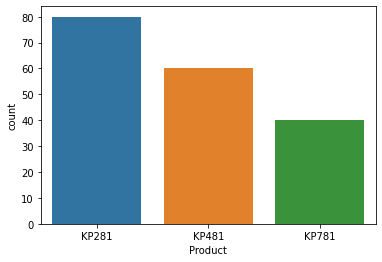

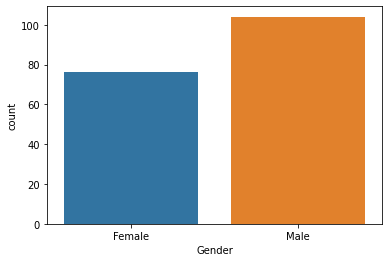

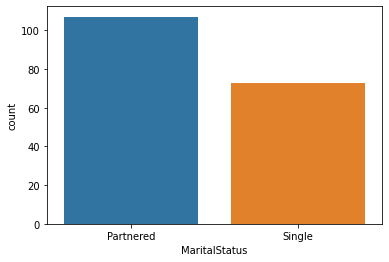

In [21]:
list_col=['Product','Gender','MaritalStatus']

for col in list_col:
  sns.countplot(x=col,data=data)
  plt.show()

- Majority customers brought KP281.
- There are more Male customers than Female customers.
- Most of the customers who purchased treadmill are Married.

In [22]:
pd.crosstab(data['Product'],data['Gender'] )

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


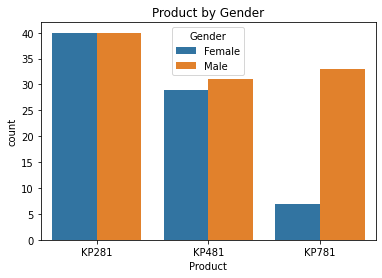

In [23]:
sns.countplot(x="Product", hue="Gender", data=data)
plt.title('Product by Gender')
plt.show()

The high end model of KP781 is mostly bought by males whereas the lower and mid level range of KP281 and KP481 are almost equally likely purchased by men and women.

In [24]:
pd.crosstab(data['Product'],data['MaritalStatus'] )

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


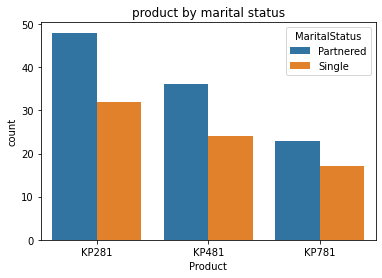

In [25]:
sns.countplot(x="Product", hue="MaritalStatus", data=data)
plt.title('product by marital status')
plt.show()

Partenered customers purchase more than the singles.

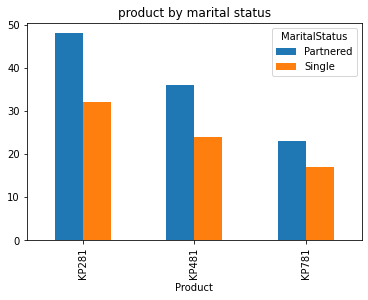

In [26]:
prd_status=pd.crosstab(data['Product'],data['MaritalStatus'] )
prd_status.plot(kind='bar')
plt.title('product by marital status')
plt.show()

### For continuous variable(s): Distplot, countplot, histogram for univariate analysis

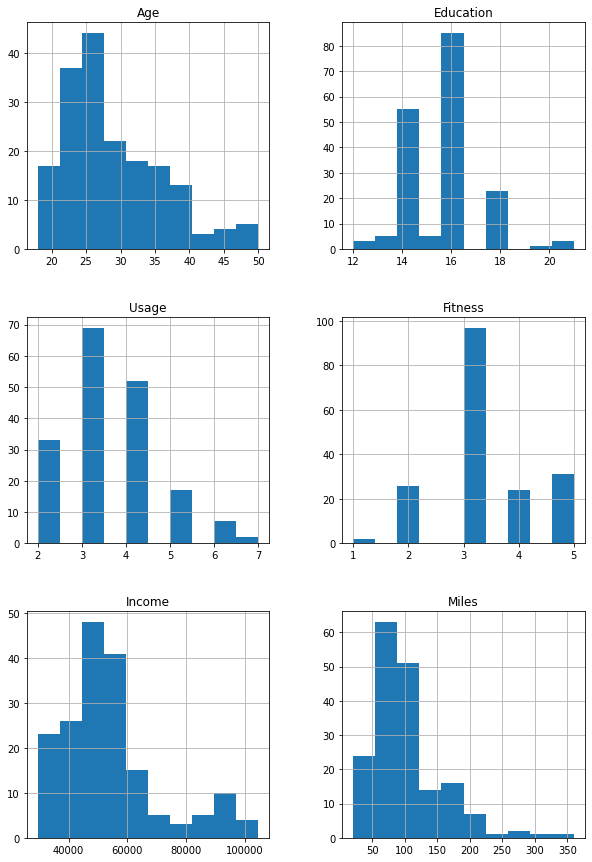

In [27]:
# histograms for numerical features
data.hist(figsize=(10,15))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

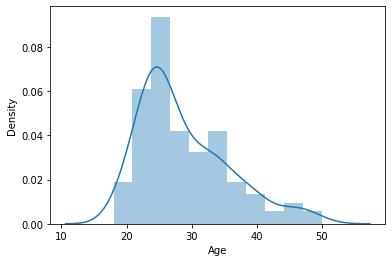

In [28]:
sns.distplot(data['Age'])

## Multivariate

<Figure size 864x504 with 0 Axes>

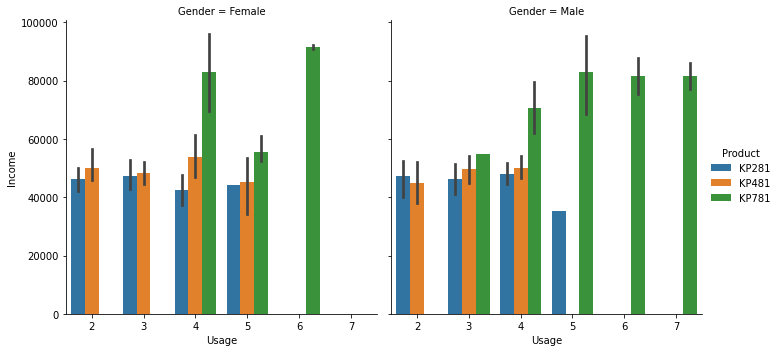

In [29]:
plt.figure(figsize=(12,7))
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=data) 

- Male customers with higher income bought KP 781 and expect to use treadmill 4-6 times a week.

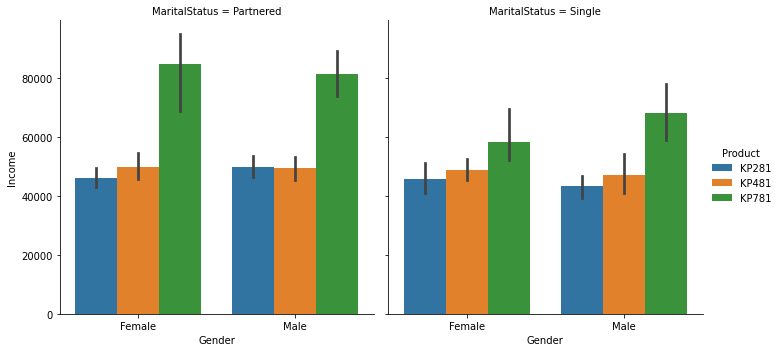

In [30]:
# Income by gender by product and by marital status
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=data,kind='bar');

In [31]:
prd_mar_gen=pd.crosstab(index=data['Product'],columns=[data['MaritalStatus'],data['Gender']])
prd_mar_gen

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
KP281                27   21     13   19
KP481                15   21     14   10
KP781                 4   19      3   14

<AxesSubplot:xlabel='Product'>

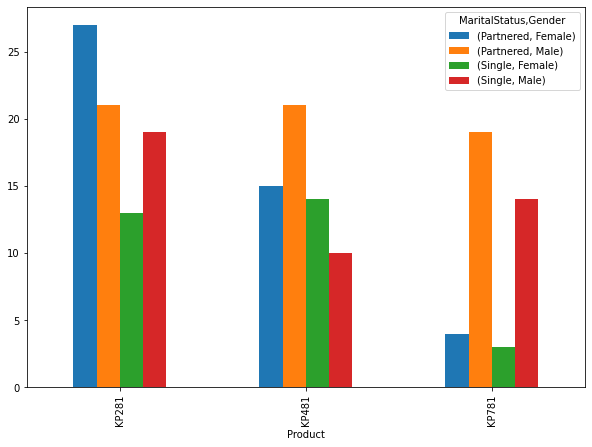

In [32]:
prd_mar_gen.plot(kind='bar',figsize=(10,7))

Let us answer some important ques- 

Ques1 - Which product works for which gender?

<AxesSubplot:xlabel='Product', ylabel='Usage'>

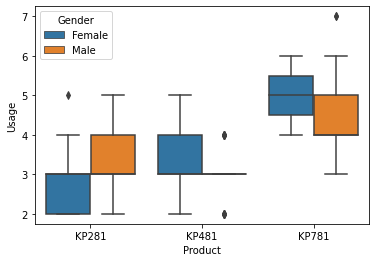

In [33]:
sns.boxplot(x='Product',y='Usage',hue='Gender',data=data)

Lower end model works mostly for males while high end model works for females.

Ques2 - Given male, what is the probability of buying the three products ?

In [34]:
pd.crosstab(data['Product'],data['Gender'] )

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [35]:
len(data[(data['Product']=='KP281') & (data['Gender']=='Male')])/np.sum(data['Gender']=='Male')   # Cases of being Male buying KP281

0.38461538461538464

In [36]:
len(data[(data['Product']=='KP481') & (data['Gender']=='Male')])/np.sum(data['Gender']=='Male')   # Cases of being Male buying KP481

0.2980769230769231

In [37]:
len(data[(data['Product']=='KP781') & (data['Gender']=='Male')])/np.sum(data['Gender']=='Male')   # Cases of being Male buying KP781

0.3173076923076923

- 38.4 % Males prefer to buy KP281 
- 29.8 % Males prefer to buy KP481 
- 31.7 % Males prefer to buy KP781 

In [38]:
len(data[(data['Product']=='KP281') & (data['Gender']=='Female')])/np.sum(data['Gender']=='Female') 

0.5263157894736842

In [39]:
len(data[(data['Product']=='KP481') & (data['Gender']=='Female')])/np.sum(data['Gender']=='Female')   # Cases of being Male buying KP481

0.3815789473684211

In [40]:
len(data[(data['Product']=='KP781') & (data['Gender']=='Female')])/np.sum(data['Gender']=='Female')

0.09210526315789473

- 52.6 % Femles prefer to buy KP281 
- 38.15 % Females prefer to buy KP481 
- 9.2 % Females prefer to buy KP781 

Ques 3 - What is the marginal probabilites of Product1, Product 2 , Product 3 being bought?

In [41]:
np.sum(data['Product']=='KP281')/len(data)

0.4444444444444444

In [42]:
np.sum(data['Product']=='KP481')/len(data)

0.3333333333333333

In [43]:
np.sum(data['Product']=='KP781')/len(data)

0.2222222222222222

The marginal probabilites are as follows -

- The probability of KP281 being bought - 44.4%

- The probability of KP481 being bought - 33.3%

- The probability of KP781 being bought - 22.2%

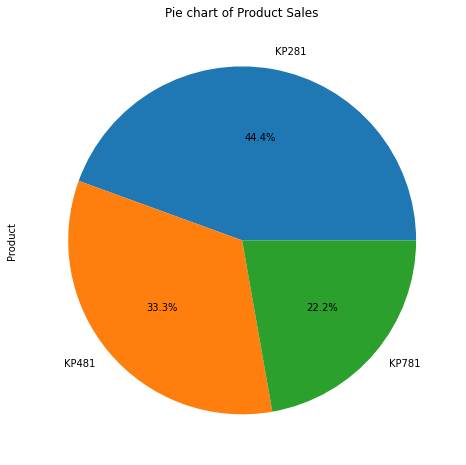

In [44]:
plt.figure(figsize=(14,7))
data['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Pie chart of Product Sales")
plt.show()

# Insights -


### Data Exploration  

- Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.
- Maximum income of treadmill user is 100K , Average income approx. 54K ,while median is is approx. 51K.
- Expected Treadmill usage is atleast Once a week , maximum is 7 times a week and on Average 3 times a week
- Customer education is between 12 -21 years, with average and median of 15 years and maximum of 16 years
- Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.
- Average self rated fitness is 3.



- Age and income are positively correlated
- Education and income are positively correlated
- Usage is correlated with Fitness ans Miles

- In terms of age and education , males and females are almost same.
- Males have higher self rated fitness, more usage, more income , more number of miles than females.

KP281 was bought by 80 customers whose -
- Average age of customer is 28.5 , Median is 26
- Average Education is 15 and median is 16.
- Expected usage is 3 day a week
- Expected Miles to run is on an Average 82.78 miles per week and median is 85.
- Self rated fitness is 3 that is average fitness level
- Average income and median is around $46K.





KP481 was bought by 60 customers whose -
- Average age of customer is 28.9 , Median is 26
- Average Education is 15 and median is 16.
- Expected usage is 3 day a week
- Expected Miles to run is on an Average 88 miles per week and median is 85.
- Self rated fitness is 3 that is average fitness level
- Average income and median is around $49K.


KP781 was bought by 40 customers whose -
- Average age of customer is 29, Median is 27
- Average Education is 17 and median is 18.
- Expected usage is 4-5 days/week.
- Expected Miles to run is 166miles/week.
- Self rated fitness is 4.6 on average.
- Average income and median is around 76K.


- Median income is 50K, most customers hav income below 70K, some outliers who earn bbeyond 80K.
- Median age of cusotmers is 26, most in range 20-40.

- Miles average is 80, some outliers run more than 200miles/week

- Most of the customers have self-rated their fitness as 3( average).

- Most of the customers have 16 year of education, there are few outliers.

- Most of customers expect they will be using the treadmill 3-4 days per week, few outliers expecting to use treadmill for 6 or 7 times a week




#### Descriptive Statistics

- The entry level KP281 is purchased most number 
of times followed by mid level KP481 and last the highest grade KP781 is sold the least.

- Male buy more products than females.

- People with relationship status as Partnered buy more products than the singles.



It is clearly seen that the high end KP781 is bought by customers who -

- have age 25-30 years old  but many outliers who have age >40 for this treadmill.
- have a larger number of education years (~16-18)
- have self rated fitness of 4-5
- plan to use equipment 4-5 times a week
- have significantly higher income ($60000 and above)
- expect significantly higher number of miles to walk each week (>150).
- customers for this high end model are more educated, more rich, plan to use it more frequently, run more miles, have high self rated fitness, more health conscious.
- more males and more partnered buy this model

This is in contrast to both the low and mid level models KP281 and KP481 who are bought by customers who -

- have age 23-33 years old.
- have a somewhat less number of education years (~14-16)
- have self rated fitness of 3
- plan to use equipment 3-4 times a week
- have significantly lower income ($50000 and less)
- expect significantly lower number of miles to walk each week (less than 100).

##### Probabilities -

The marginal probabilites are as follows -

- The probability of KP281 being bought - 44.4%

- The probability of KP481 being bought - 33.3%

- The probability of KP781 being bought - 22.2%

The conditional probabilities are - 

- 38.4 % Males prefer to buy KP281 
- 29.8 % Males prefer to buy KP481 
- 31.7 % Males prefer to buy KP781 

- 52.6 % Femles prefer to buy KP281 
- 38.15 % Females prefer to buy KP481 
- 9.2 % Females prefer to buy KP781 

# Recommendations-

- KP281 and KP481 are bought by cusotmers with less than 60K income< these models should be marketed as 'Budget Treadmills'.

- KP781 is bought by more elite , educated , rich, fintess conscious class of professionals or athletes so should be marketed as a 'Luxurious Brand'.

- KP781 being the high end model targeting high class and athletes, should be promoted by some known athlete to boost sales.

- To enhance female sales, special offers on Womens Day, Mothers Day should be promoted emphasizing on women health and fitness.